In [82]:
# specify your student id and your name
id = '20072488'
name = 'Ciara Power'

In [123]:
# setup magic - see kmurphy.bitbucket.org/modules/Advanced_Calculus for setup instructions.
%matplotlib inline
import os
if os.path.exists('calculus'):
    from calculus import *
    setup_practical(id, name)

Ver 0.1


# Practical 01 - Quadratics

## Introduction

### Aim

In our first practical we will take things easy and just use python to study quadratic equations. In particular:

 * Solve quadratic equations, (or for quadratic function determine inputs for which the output is zero).
 * Graph quadratic functions, and pimp graphs to show intercept, max/min point and roots (if any).
 * Show how the bahaviour of quadratic functions changea as their parameters change.

### Mathematics Concepts

Some basic concepts

 * A __quadratic function in x__ is a function of the form
\\[
    f(x) = a x^2 + b x + c
\\]
where $x$ is the __input__, and $a$, $b$, and $c$ are (possibly unknown) __coefficients__.

 * A __quadratic expression in x__ is an expression of the form
\\[
    a x^2 + b x + c
\\]
where $x$ is a __variable__, and $a$, $b$, and $c$ are (possibly unknown) __constant coefficients__.

 * A __quadratic equation in x__ is an equation containing a quadratic expression, as in 
\\[
    a x^2 + b x + c = 0
\\]
where $x$ is a __variable__, and $a$, $b$, and $c$ are (possibly unknown) __coefficients__.

> When writing mathematics we are often very sloppy in indicating whethere we are talking about a function, or an expression, or an equation, and rely on the intellegence of the reader to determine what is being talked about.  In programming we can't be ambiguous, because computer are ... well ... stupid.  


 * The __intercept__ is given by the value of the constant term, $c$.
 
 * The value of x at which the quadratic assumes its maximum/minimum value is given by
\\[
    x = -\frac{b}{2a}
\\]
 * This point will be a maximum if $a<0$ and a minimum if $a>0$, where $a$ is the coefficient of $x^2$. 




### 1.3. Python Syntax/Modules/Commands

In the previous semester most, if not all, of the python code that you wrote dealt with numeric data. There is an alternative programming paradigm called __symbolic programming__ in which our python variables are treated like we treat mathematical symbols. To learn more about  programming paradigms, have a look at

 * [Six programming paradigms that will change how you think about coding](http://www.ybrikman.com/writing/2014/04/09/six-programming-paradigms-that-will/)
 
 * [Programming Paradigms for Dummies: What Every Programmer Should Know](http://www.ybrikman.com/writing/2014/04/09/six-programming-paradigms-that-will/)
 
 (The second link is much longer and I'm not expecting you to read all/much of it - just have a read over a coffee or two.) 

The python module, SymPy, has an large set of functions to support symbolic programming. Some decent SmyPy resource include

 * [Taming math and physics using SymPy](http://minireference.com/static/tutorials/sympy_tutorial.pdf)
 
 This is an excellent tutorial based on the __No bullshit guide__ series of textbooks by Ivan Savov. It uses Python 2.+, instead of 3.+ that we use, but that is not a big issue. 

 * [SymPy - IPython Notebook Tutorial (youtube)](https://www.youtube.com/watch?v=cvHyaE_bs8s)
 

To use _sympy_, I typically import it using 

    import sympy as sym

and the commands that I find most useful are 

 * [collect](http://docs.sympy.org/dev/tutorial/simplification.html#collect) used to reorder the sequence of terms in an expression so that terms with common powers are together.
 * [evalf](http://docs.sympy.org/dev/modules/core.html#module-sympy.core.evalf) used to convert a symbol/expression to nearest numerical value, see also [n](http://docs.sympy.org/dev/modules/core.html#module-sympy.core.evalf)
 * [expand](http://docs.sympy.org/dev/modules/rewriting.html#expanding) used to expand (multiply out factors/powers).
 * [factor](http://docs.sympy.org/dev/tutorial/simplification.html#factor) used to express a polynomial as a product of its factors. (This is the reverse of expand).
 * [solve](http://docs.sympy.org/dev/modules/solvers/solvers.html) used to solve equations by finding zeros of expressions/functions.
 * [subs](http://docs.sympy.org/dev/modules/numeric-computation.html#subs-evalf) used to replace a symbol in an expression by a different symbol or an expression.
 * [symbols](http://docs.sympy.org/dev/modules/core.html#module-sympy.core.symbol) used to declare/define a symbol. 
 * [symplify](http://docs.sympy.org/dev/modules/simplify/simplify.html#id1) collection of heuristics that aim to simplify a mathematical expression.
 
See [SymPy's documentation](http://docs.sympy.org/dev/modules/index.html) for more detail.

## Why Symbolic Computing ?

Standard computing paradigm using numerica data (based on floating point arithmetic, see [What Every Computer Scientist Should Know About Floating-Point Arithmetic](https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html)) is focused on speed over accuracy.  This is usually what we want - we are often happy to have __some__ loss of accuracy in order to speed up calculations. For example, most graphics cards still use _float_ rather than _double_ (If interested, see the gamedev.StackExchange article [About floating point precision and why do we still use it](http://gamedev.stackexchange.com/questions/3351/about-floating-point-precision-and-why-do-we-still-use-it). 

However, there are situtations where accuracy is paramount. This is where symbolic computing rules.

To ilustrate the differences between the computing paradigm using numerica data (I will call this _numeric computing_ from now on) and symbolic computing, I will preform similar tasks using 
 * numpy - this is a high preformance matrix and math module using numeric data
 * sympy - the symbolic computation module discussed above 

First we import the modules ...

In [124]:
# load both libraries 
import numpy as np
import sympy as sym

Importing the module using this style allows us to access variable or functions that are defined in both modules. For example both modules define the value of $\pi$ and store it in the identifier _pi_ ...

In [125]:
np.pi

3.141592653589793

In [126]:
sym.pi

pi

Why the different output?

Well _numpy_ is a numeric library and so it represents $\pi$ by the closest nummeric value to $\pi$ that it can store. On the other had, _sympy_, is a symbolic library and so treats the irrational number $\pi$ as a symbol since it cannot represent it as a floating point number without losing accuracy. 

Ok well, are the two different representions equal ? Lets see ..

In [127]:
np.pi == sym.pi

False

The differene here is reasonable, since the symbolic representation is the exact value of $\pi$ while the numeric representation is an approximation.

What happens if we convert the symbolic representation to a numeric value?

In [128]:
np.pi == sym.pi.evalf()

True

So when we called _evalf_ we get back our standrd numeric approximation to $\pi$. Big deal!

Well, the function _evalf_ can take a parameter which specifies the accuracy in the conversion so we can do the following.

In [129]:
# standard conversion to numeric value
sym.pi.evalf()

3.14159265358979

In [130]:
# convert to numeric value using more digits ...
sym.pi.evalf(3000)

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914564856692346034861045432664821339360726024914127372458700660631558817488152092096282925409171536436789259036001133053054882046652138414695194151160943305727036575959195309218611738193261179310511854807446237996274956735188575272489122793818301194912983367336244065664308602139494639522473719070217986094370277053921717629317675238467481846766940513200056812714526356082778577134275778960917363717872146844090122495343014654958537105079227968925892354201995611212902196086403441815981362977477130996051870721134999999837297804995105973173281609631859502445945534690830264252230825334468503526193118817101000313783875288658753320838142061717766914730359825349042875546873115956286388235378759375195778185778053217122680661300192787661119590921642019

But Symbolic computing can do more than just printing out arbitrary number of digits of $\pi$, it also has a large collection of rules (not unlike the rules/formula you have learnt in mathematics) that it can use to simplify, factorise, expand or evualate expressions. For example we know that 
\\[
    \sin(\pi) = 0
\\]
What does numpy and smypy say?

In [131]:
# evaulating sin(pi) using numpy 
np.sin(np.pi)

1.2246467991473532e-16

In [132]:
# evaulating sin(pi) using smypy 
sym.sin(sym.pi)

0

So sympy return the correct answer sine it used known properties, while numpy resulted its best estimate of the result and the numeric error in the estimate is 1.7e-16.

OK, hopefully these two examples have helped you to see the benefits of symbolic computing, let us now start with a short overview of sympy.

## A Ten Minute Overview of SymPy

Before we turn to quadratic functions lets look at a few sympy examples. (We will see more examples later in the modules when you have covered differentiation).

In [133]:
import sympy as sym

### Example 1: Defining new symbols and constructing expressions 

In [134]:
a, b, c, d = sym.symbols('a, b, c, d')        # define multiple symbols
e = (a*b*b + 2*a*b*b)**c                      # create a new symbols based on existing symbols

print(e)                                      # print the expression

sym.pprint(e)                                 # pretty print the expression

(3*a*b**2)**c
        c
⎛     2⎞ 
⎝3⋅a⋅b ⎠ 


### Example 2: The expand function

In [135]:
a, b = sym.symbols('a, b')                    # define symbols
e = (a+b)**5
sym.pprint(e)                                 # pretty print before expansion
sym.pprint(sym.expand(e))                     # pretty print after expansion

       5
(a + b) 
 5      4         3  2       2  3        4    5
a  + 5⋅a ⋅b + 10⋅a ⋅b  + 10⋅a ⋅b  + 5⋅a⋅b  + b 


### Example 3: The subs function

In [136]:
x, y = sym.symbols('x, y')                    # define symbols
ex = (x+1)**3                                 # create a simple cubic
sym.pprint(ex)                                # pretty print before expansion
ex = sym.expand(ex)                           # expand expression 
sym.pprint(ex)
ex = ex.subs(x, y-1)                               # substitute x->y-1 (same as x+1->y)
sym.pprint(ex)  
ex = sym.simplify(ex)
sym.pprint(ex)                                

       3
(x + 1) 
 3      2          
x  + 3⋅x  + 3⋅x + 1
             3            2    
3⋅y + (y - 1)  + 3⋅(y - 1)  - 2
 3
y 


### Example 3: Plotting

In [137]:
# import the command for the type of plot we want
from sympy.plotting import plot

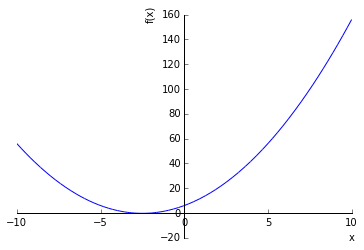

In [138]:
# simplest call (default plot range is -10..10)
plot(x*x+5*x+6)

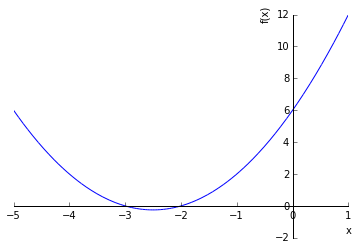

In [139]:
# change the plot range
plot(x*x+5*x+6, (x,-5,1))

Plot object containing:
[0]: cartesian line: x**2 + 5*x + 6 for x over (-5.0, 1.0)


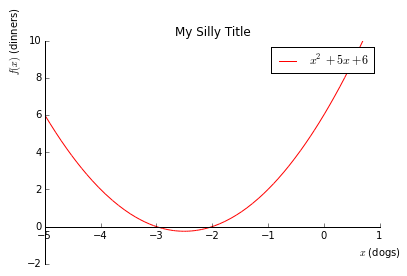

In [140]:
# pimping a plot
p = plot(x*x+5*x+6, (x,-5,1), show=False)      # generate the plot but do not show it yet
p.legend = True
p.title = "My Silly Title"
p.xlabel = r"$x$ (dogs)"
p.ylabel = r"$f(x)$ (dinners)"
p.ylim = (-2,10)                               # output range
p.axis_center = (-5,0)                         # move the axis to the left
print(p)                                       # output textual description of plot

# change properties of first curve in plot
p[0].line_color = 'r'
p[0].label = r"$x^2+5x+6$"                     # use a fancy (with maths notation) label

p.show()                                       # finally show plot
#p.save('my_silly_plot.png')                    # or save to external file (for use later)

## Working with Quadratics

OK, now that we have covered some of the basics of sympy, lets turn to quadratic functions and expressions.


In [141]:
x = sym.symbols('x')           # define symbols
ex = 2*x*x + 10*x + 12         # sample quadratic

In [142]:
# express as a equation
sym.Eq(ex)

2*x**2 + 10*x + 12 == 0

In [143]:
# solve 
sym.solve(ex, x)

[-3, -2]

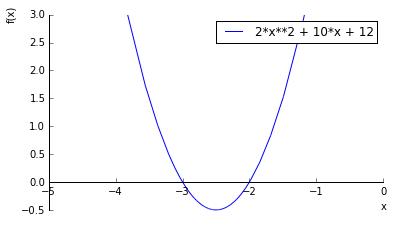

In [144]:
# plot
p = plot(ex, show=False)
p.xlim = (-5,0)
p.ylim = (-1,3)
p.axis_center = (-5,0)
p.legend = True
p.show()

In [145]:
# factorise the quadratic
ex.factor()                      # or could use sym.factor(ex)

2*(x + 2)*(x + 3)

In [146]:
# let's rebuild the quaradic using the roots and compare with the original expression
roots = sym.solve(ex,x)
print ("Roots =", roots)

new_ex = (x-roots[0])*(x-roots[1]) 
print ("\nNew expression is ", new_ex)

# check if constructed expression is same as original 
print("Is new expression the same as the original expression ?", sym.simplify(new_ex==ex))

# I forgot the coefficient in front of x squared

a = ex.coeff(x**2)
print ("\nCoefficient of x^2 is ", a)

# rebuild expression again
new_ex = a * (x-roots[0]) * (x-roots[1])

print ("\nNew expression is ", new_ex)

# check if constructed expression is same as original 
print("Is new expression the same as the original expression ?", sym.simplify(new_ex==ex))

# what is wrong now ? ... should expand and simplfy new expression
new_ex = new_ex.expand()

# Third time .... check if constructed expression is same as original 
print("\nIs new expression the same as the original expression ?", sym.simplify(new_ex==ex))

Roots = [-3, -2]

New expression is  (x + 2)*(x + 3)
Is new expression the same as the original expression ? False

Coefficient of x^2 is  2

New expression is  (x + 2)*(2*x + 6)
Is new expression the same as the original expression ? False

Is new expression the same as the original expression ? True


In [147]:
# get the intercept  (the constant coefficient)
c = ex.subs(x,0)                             # can't use coeff, so instead, just set x=0 and see what is left
print ("The intercept is", c)

The intercept is 12


In [148]:
# get the min/max value of a quadratic using the formula x=-b/2a 
a = ex.coeff(x**2)        
b = ex.coeff(x)
x_min = -b/(2*a)
y_min = ex.subs(x,x_min)

print ("Min/max point is at", (x_min,y_min))

Min/max point is at (-5/2, -1/2)


In [149]:
# lets be smart and determine whether it is a max or is a min

optimal_type = "min" if a>0 else "max"
print ("The optimal point is a", optimal_type, "and is located at", (x_min,y_min))

The optimal point is a min and is located at (-5/2, -1/2)


## Exercises

Finally we get to the practical bit of your practical ... dont worry in later weeks there will be less preamble and more practical ...

#### Question 1
The number of bacteria in a refrigerated food is given by
\\[
    f(t)=20t^2 −20t+120,
\\]
for \\(− 2\le t \le 14\\) and where $t$ is the temperature of the food in Celsius. 

 * Generate a graph showing the bacteria population over interval of interest and properly label the graph.
 * Determine the temperature at which the population is minimised. And what is this minimum population?


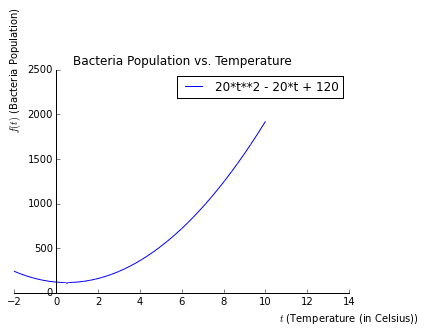

In [167]:
# Generate a graph show the bacteria population over interval of interest and properly label the graph.
t = sym.symbols('t')          
ex = 20*t**2 - 20*t + 120
p = plot(ex, show=False)
p.xlim = (-2,14)
p.legend = True
p.title = "Bacteria Population vs. Temperature"
p.xlabel = r"$t$ (Temperature (in Celsius))"
p.ylabel = r"$f(t)$ (Bacteria Population)"
p.show()

In [168]:
# Determine the temperature at which the population is minimised. And what is this minimum population?
a = ex.coeff(t**2)        
b = ex.coeff(t)
t_min = -b/(2*a)
n_min = ex.subs(t,t_min)

print ("The temperature at which the population is minimised is", t_min,"Celsius" )
print ("The minimum population is", n_min,"bacteria" )

The temperature at which the population is minimised is 1/2 Celsius
The minimum population is 115 bacteria


#### Question 2
The height, $h$, in metres of an object above the ground is given by
\\[
    h=−16t^2 +64t+190,
\\]
where $t\ge 0$ is the time in seconds since the object was thrown. 

 * Generate a graph showing the height of the object over time
 * Determine the time it takes the object to reach its maximum height.
 * Determine the maximum height of the object. 
 * Determine the time it takes the object to strike the ground.


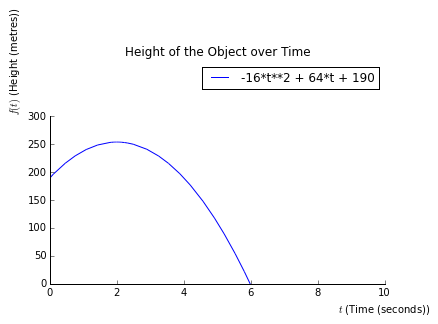

In [169]:
# Generate a graph showing the height of the object over time
t = sym.symbols('t')          
ex = -16*t**2 + 64*t + 190
p = plot(ex, show=False)
p.xlim = (0,10)
p.ylim = (0,400)
p.legend = True
p.title = "Height of the Object over Time"
p.xlabel = r"$t$ (Time (seconds))"
p.ylabel = r"$f(t)$ (Height (metres))"
p.show()

In [170]:
# Determine the time it takes the object to reach its maximum height.
a = ex.coeff(t**2)        
b = ex.coeff(t)
t_max = -b/(2*a)
print("The time it takes the object to reach its maximum height is", t_max,"seconds")

The time it takes the object to reach its maximum height is 2 seconds


In [171]:
# Determine the maximum height of the object.
h_max = ex.subs(t,t_max)
print("The maximum height of the object is",h_max,"metres")

The maximum height of the object is 254 metres


In [172]:
# Determine the time it takes the object to strike the ground.
full_time=(( sym.solve(ex,t))[0]).evalf(3)
print("The time taken for the object to hit the ground is",full_time,"seconds (rounded to two places of decimal)")

The time taken for the object to hit the ground is 5.98 seconds (rounded to two places of decimal)
